## Arthur do Val -  Presenças na ALESP

Fonte: https://www.al.sp.gov.br/alesp/presenca-plenario/

Criado por: Yuri Campolongo

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path
from bs4 import BeautifulSoup

In [121]:
presencas_df = []
meses = [1,2,3,4,5,6,7,8,9,10,11,12]
anos = [2019,2020]

for ano in anos:
    for mes in meses:
        if os.path.exists('presenca_arthur/mes ' + str(mes) + " " + str(ano) + ".html"):
            file = 'presenca_arthur/mes ' + str(mes) + " " + str(ano) + ".html" 
            soup = BeautifulSoup(open(file))
            presenca_infos = soup.find_all('td', {"class" : "infoPresenca"})
            presenca_infos = presenca_infos[1:-2]
            dias = []
            tipo_sessao = []
            presenca = []
            mes_info = []
            ano_info = []
            size = len(presenca_infos)
            current = 0
            if size > 0:
                while current < size:
                    dias.append(presenca_infos[current].text.strip())
                    current += 1
                    tipo_sessao.append(presenca_infos[current].text.strip())
                    current += 1
                    presenca.append(presenca_infos[current].text.strip())
                    current += 1
                    mes_info.append(mes)
                    ano_info.append(ano)
                df = pd.DataFrame(list(zip(dias, tipo_sessao, presenca, mes_info, ano_info)), columns=['dia', 'tipo_sessao', 'presenca', 'mes', 'ano'])
                df = df.set_index(['dia', 'mes', 'ano'])
                presencas_df.append(df)
todas_presencas = pd.concat(presencas_df)

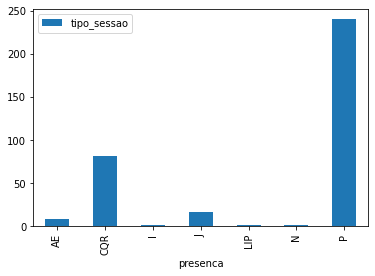

In [126]:
count = todas_presencas.groupby('presenca').count()

count.plot.bar()

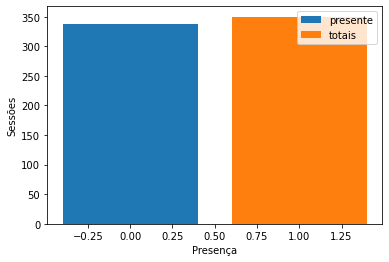

In [170]:
ajustada = todas_presencas.query("presenca == 'P' or presenca == 'J'") # cqr conta como falta ou presença?

ajustada = ajustada.groupby('presenca').count()

presencas_totais = ajustada['tipo_sessao'][0]

plt.bar([0], [presencas_totais], label='presente')
plt.bar([1], [len(todas_presencas['presenca'])], label='totais')
plt.legend()
plt.xlabel('Presença')
plt.ylabel('Sessões')
plt.show()

In [177]:
#porcentagem final

pct = (presencas_totais * 100) / len(todas_presencas['presenca'])


print('Arthur tem ' + str(pct) + "% de presença nas sessões")


Arthur tem 96.57142857142857% de presença nas sessões
